# Project Lab #1: Part 3

## Numerical convergence, designing successful flybys!
______



### Part 3A) Make a Module `flyby_fns`


<div class="alert alert-block alert-info">
<b>Coding Note:</b> Additional functions beyond those described in <b>Part 2</b> are not required for Part 3, but if you choose to write any, they must have docstrings that include a brief description of what the function does, inputs and outputs with units.  You should add them to the module <b>flyby_fns</b>.  See below.
</div>

- Copy the code from your Jupyter notebook from **Part 2** into a `.py` file called `flyby_fns.py`. The new python file *must* contain relevant `import` statements for the module and the four functions `grav_acc`, `checkinit`, `sc_vel_pos_change` and `get_traj` from **Part 2**.

- Make sure that your python file contains functions in the same order that they were in your **Part 2** notebook.
  
- Test that your `.py` file can be imported and run without error by importing the file as a module from a new notebook. Use this module for the remainder of the assignment. 
> e.g. `import flyby_fns as flyby` will import your module, naming it `flyby` in your notebook, so you can call e.g. `get_traj` with `flyby.get_traj(...)`.




<br>



In [2]:
import time as balls #it doesn't have to be balls but if you change it, you have to change the call in the timing cell as well
import numpy as np
import math
import matplotlib.pyplot as plt
import flyby_fns as flyby

v_x0 = 0 #(m/s)
v_y0 = 7000 #(m/s)
time_step = 60 
total_time = 40 * 60 #(s)
planet_mass = 3.3e23 #(kg)
planet_radius = 2440*1000 #(m)
s_x0 = -3050*1000 #(m)
s_y0 = -3*planet_radius #(m)
time, acc, vel, pos = flyby.get_traj(s_x0, s_y0, v_x0, v_y0, time_step, total_time, planet_mass, planet_radius)

___ 

<div class="alert alert-block alert-info">
<b>Pseudocode:</b> For each of sections 3C, 3D, and 3E below read the instructions and first write pseudo-code outlining your algorithm BEFORE coding.  You don't need to turn your pseudo-code in, but writing it will save you a lot of effort & time.
</div>




### Part 3C) Numerical Convergence.
 
#### 3C - i) Effect of Starting Conditions
- For altitude, $a$, above the planet surface, explore what happens to the closest approach altitude, $a_c$, when you change the y-coordinate of the initial spacecraft position ($s_{y0}$).
  > - Start with initial position, $s_\mathrm{x 0}=-3050 \mathrm{~km}, s_\mathrm{y 0}=-3 R_{p}$ as in Part 2C.  Define a variable that will contain your closest approach altitude, and then write code to repeat the calculation for 9 additional values of $s_{y0}$, each one set to be double the previous value. 
  >  
  > -  Each time you double $s_{y0}$ you must also double the total integration time, $t_f$.
  >   
  > -  Print a 2-column output to the screen that gives the $s_{y0}$ coordinate in units of $R_p$ and closest approach altitude in kilometres for each choice of $s_{y0}$. Round your answer to 1 decimal point.  Your print output should have the following layout and be formatted neatly as below:   


```     
        s_y0 (Rp)	min alt (km)
        -3.0		365.0
        -6.0		3xx.x
        -12.0	        2xx.x
        ...             ...
```       
     

- Write your 2-column output to a file `part3C_sx0_CA.txt`. Make sure that the file is properly formatted and readable. 

<!-- <br>

---
<div class="alert alert-block alert-info">
<b>Coding Notes:</b> 
    
    !!!------ CJ NOTE
    !!!----- I didn't find this very clear.  e.g. what is "table"?
    !!!----- Should we use file.open, file.close, file.write and formatted o/p instead?
    !!!---- It would be nice to remove this from the lab description and include examples in class on Thurs wk 11 and/or Tues wk12.  We haven't yet done anything with writing basic data o/p files and this is a pretty essential skill. We could also cover (not used here any more but good for reports) how to save figs as pngs or pdfs etc.
    !!!---- in instructions above should we have them make a list of all sy0 and list of all a_c?  This would make grading easier.  They could append each sy0, a_c in the loop to their list - aka "build as you go".


- To create a 2-column output of $s_{y0}$ and closest approach altitude: Create a list of formatted strings to generate a table with a header row and then rows with each pair of `sy0` and `closest approach altitude` values. 

- You can use the following syntax to write your list 'table' to the file: 

```python
with open(filename, 'w') as f: 
    f.writelines(table)
```
s
</div> -->


<br>


In [3]:
total_time = 40*60
s_y0 = -3*planet_radius

#bro i dont fucking know why or how this works 
#but like every time i run this it's like a 50/50 on working properly or crashing

for _ in range(10):
    time, acc, vel, pos = flyby.get_traj(s_x0, s_y0, v_x0, v_y0, time_step, total_time, planet_mass, planet_radius)
    
    altitude = np.linalg.norm(pos, axis=1) - planet_radius
    min_alt = np.round(np.min(altitude)) 

    print(f'{(s_y0/planet_radius)}km, {min_alt/1000}km')
    
    total_time *= 2
    s_y0 *= 2
#idk how to put this in the text file like they ask of us

-3.0km, 364.835km
-6.0km, 300.677km
-12.0km, 266.683km
-24.0km, 248.947km
-48.0km, 238.538km
-96.0km, 238.215km
-192.0km, 235.491km
-384.0km, 227.602km
-768.0km, 228.856km
-1536.0km, 228.119km



___ 

#### 3C - ii) Effect of time step

- Set up another simulation:
> - Set $s_{y0}$ to be  $-96 R_p$. (Although it should be larger, this makes the computations take longer.)
>
>  - Set the total time for the integration, $t_f$, to be 1280 minutes.
>  
>  -   Define a variable $a_\mathrm{target}$ for the target closest approach altitude. Set $a_\mathrm{target}$ to be 195 km.    


- Now investigate the effect of the time increment $(\Delta t)$ used in the numerical integration.
> -  Start with $\Delta t = 60$  seconds, compute the spacecraft trajectory, then halve the value of $\Delta t$. Keep $t_f = 1280$ mins. Repeat until the closest approach altitude $a_c$ is within 2% of the target altitude, that is until the percentage error $100*(a_c - a_\mathrm{target})/a_\mathrm{target}$ falls just below 2. This is best done using a `while` loop.
> 
> -  Use `time.perf_counter` to measure the elapsed time for each $\Delta t$. You’ll see that the computation time scales with the number of time steps. The reading `project_lab1_part3_reading.pdf`, section '**Timing your code**' details how to use `time.perf_counter`.

<br> 

- **Figure 1:** Make a figure with 2 subplots.
> - In the top one show the percentage error in the closest approach altitude as a function of 1/$\Delta t$. You should see smooth convergence of the results toward the desired target altitude, but at increasing computational expense. In fact, in our case the results converge only to within about 2% of the target altitude, because to converge more closely to the actual target altitude you would also need to use an initial $s_{y0}$ position futher from the planet.
>   
> - In the lower figure plot the percentage error versus $\Delta t$, and label your plot with the final $\Delta t$ needed to reach the 2% error criterion above, and the computation time for that $\Delta t$. 

 <br> 


In [70]:
s_y0 = -96*planet_radius
total_time = 76800
time_step = 60
target_alt = 195000
errors = []
time_steps = []
math_funnys = []
t_start = balls.perf_counter()

time, acc, vel, pos = flyby.get_traj(s_x0, s_y0, v_x0, v_y0, time_step, total_time, planet_mass, planet_radius)
altitude = np.linalg.norm(pos, axis=1) - planet_radius
min_alt = np.round(np.min(altitude))
percent_error = 100 * (min_alt - target_alt)/target_alt

while percent_error > 2:
    time_steps.append(time_step)
    math_funny = 1/time_step
    math_funnys.append(math_funny)
    errors.append((percent_error))
    time_step /= 2
    time, acc, vel, pos = flyby.get_traj(s_x0, s_y0, v_x0, v_y0, time_step, total_time, planet_mass, planet_radius)
    altitude = np.linalg.norm(pos, axis=1) - planet_radius
    min_alt = np.round(np.min(altitude)) 
    percent_error = 100 * (min_alt - target_alt)/target_alt
    

time_steps.append(time_step)
math_funnys.append(1/time_step)
errors.append((percent_error))

t_stop = balls.perf_counter()


print(f'elapsed time: {t_stop - t_start:.2e} seconds.')
print(percent_error, errors, time_steps, len(math_funnys))

elapsed time: 1.34e-02 seconds.
-47.48307692307692 [-47.48307692307692] [60] 1


Text(65, 0, ' Computational time: 7.14e-01.')

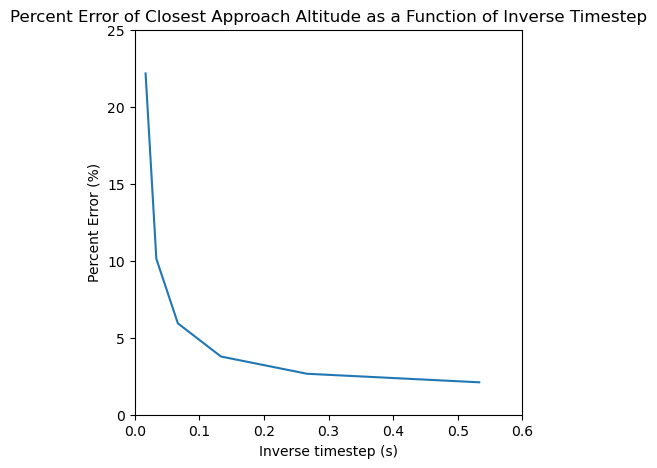

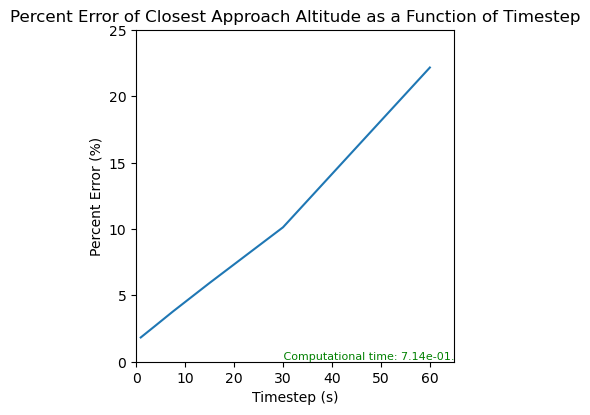

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5))

ax.plot(math_funnys[0:6], errors[0:6]) # bc not including last value (the one below 2%)
ax.set_xlim(0, 0.6)
ax.set_ylim(0, 25)
ax.set_xlabel('Inverse timestep (s)')
ax.set_ylabel('Percent Error (%)')
ax.set_title('Percent Error of Closest Approach Altitude as a Function of Inverse Timestep')

fig2, ax2 = plt.subplots(1, 1, figsize = (5,5))
fig2.tight_layout(pad = 5)
ax2.plot(time_steps, errors)
ax2.set_xlim(0, 65)
ax2.set_ylim(0, 25)
ax2.set_xlabel('Timestep (s)')
ax2.set_ylabel('Percent Error (%)')
ax2.set_title("Percent Error of Closest Approach Altitude as a Function of Timestep")
label_text = (f' Computational time: {t_stop - t_start:.2e}.')
ax2.text(65, 0, label_text, ha='right', va='bottom', color='green', fontsize=8)

___ 

### 3C - iii) Short discussion

- Read the text in section **Numerical Convergence Experiments** in the `project_lab1_part3_reading.pdf` file.   Can you think of a way to choose the time stepping to speed things up for a very large value of $s_{y0}$ while retaining the accuracy needed? Write one or two sentences (3 max) on how you might do this.  

- Write your answer as a comment at the bottom of your code cell for Part C in your Jupyter notebook.
 <br> 
 

Use adaptive time stepping - have the time step decrease at the same rate as the position decrease relative to itself,
so that they maintain the same rate of descent to the minimum altitude.


___ 

### 3D) Designing Successful Flybys

- **Parameters and Approach:**
> - Set $s_{y0} = −96R_p$. Set $t_f$ to be 1280 minutes.
>   
> - Include the target altitude variable $a_\mathrm{target}$ and set it to be 195 km.
>   
> - Set $\Delta t$ to be 5 seconds. We know from **3C-ii)** that it should be less than 5 seconds but this would take a while to compute.  
> 
> -  When you have working code for this section, you can check that changing $\Delta t$ to the value you found you needed in **3C-ii)** doesn’t significantly change your answer.
>  
> - Using a nested loop evaluate the spacecraft trajectories for initial velocities $v_{y0}$ ranging from 4.0 km/s to 8 km/s in 0.5 km/s intervals, and for initial x- positions $s_{x0}$ that range from $−(R_p + 4*a_\mathrm{target}$)  to $−(R_p + a_\mathrm{target}$) in intervals of $a_\mathrm{target}$.

<br> 


- **Figure 2:** Make a contour map to show the closest approach altitude.
> - Contour the closest approach altitude as a function of initial x-position (x-axis) and initial y-velocity (y-axis).
>   
>  - On your plot highlight the region of the plot that lies within 5 km of the target altitude (approximately our 2% criterion in part **3C-ii)**. 

<div class="alert alert-block alert-info">
<b>Coding Notes:</b> 
    
- You can highlight a region on the plot by plotting a second set of contours using only two contour levels for $a_{target}$ ± 5 km, and specifying the color and line thickness for those contours. 
- Failed experiments (spacecraft crashes) should not be contoured. Note that it is best to NOT set spacecraft crashes to NaN, because the contour plot will look ugly. Instead keep the (unrealistic) spacecraft altitudes but don’t show these contours.
</div>

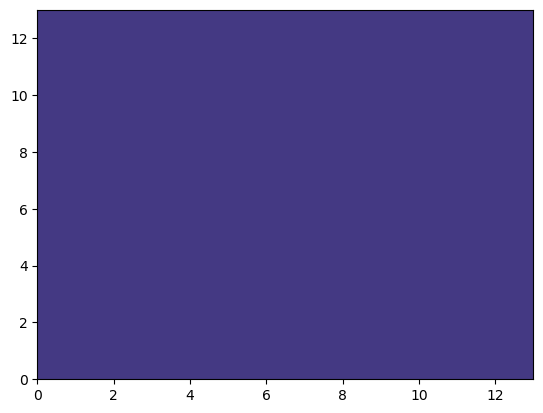

In [76]:
s_y0 = -96*planet_radius
total_time = 1280 * 60 #(s)
time_step = 0.9375
target_alt = 195 * 1000 #(m)
initial_pos = -(planet_radius + (4* target_alt))
last_pos = -(planet_radius + target_alt)

vel_values = np.arange(4000, 8000 + 500, 500)
pos_values = np.arange(initial_pos, last_pos, target_alt)

def mag(x, y):
    arr = np.ones(len(x)) * np.nan
    for i in range(len(x)):
        arr[i] = math.sqrt(x[i]**2 + y[i]**2)
    return arr

def find_lowest_altitude(x):
    return np.argmin(x)

lowest_alt_x = np.array([])
lowest_alt_y = np.array([])
lowest_alt = np.array([])

for s_x0 in pos_values:
    for v_y0 in vel_values:
        time, acc, vel, pos = flyby.get_traj(s_x0, s_y0, v_x0, v_y0, time_step, total_time, planet_mass, planet_radius)
        altitude = mag(pos[:, 0]/1000, pos[:, 1]/1000) - planet_radius/1000
        if (np.min(altitude) > 0):
            lowest_alt_x = np.append(lowest_alt_x, pos[find_lowest_altitude(altitude), 0])
            lowest_alt_y = np.append(lowest_alt_y, pos[find_lowest_altitude(altitude), 1])
            lowest_alt = np.append(lowest_alt, np.min(altitude))
        
        
        
# print(np.round(lowest_alt_x * lowest_alt_y.reshape(-1, 1), 1))
# print(np.round(lowest_alt_x), np.round(lowest_alt_y))
# print(lowest_alt_x/1000 * lowest_alt_y.reshape(-1, 1)/1000)
# plt.contourf(lowest_alt_x/1000 * lowest_alt_y.reshape(-1, 1)/1000)

# print(lowest_alt)

plt.contourf((lowest_alt/1000) * (lowest_alt.reshape(-1, 1)/1000), 
             levels = np.arange(0, target_alt/1000 + 5, 50))


TypeError: Input z must be 2D, not 1D

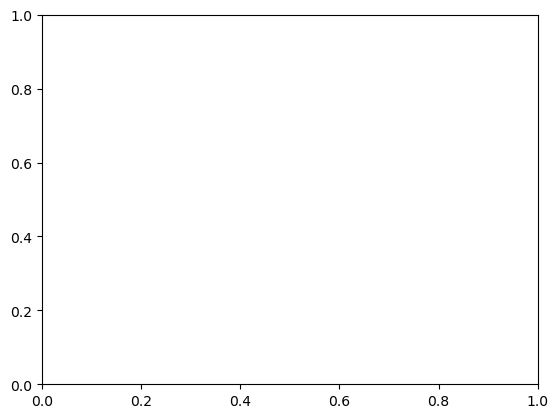

In [138]:

a, b = np.meshgrid(lowest_alt_x, lowest_alt_y)
plt.contourf(
        a, b, np.sqrt(lowest_alt_x ** 2 + lowest_alt_y **2), 
    )

In [130]:
# plt.contourf((lowest_alt/1000) * (lowest_alt.reshape(-1, 1)/1000), 
#              levels = np.arange(0, target_alt/1000 + 5, 5))

# plt.contourf(pos_values * vel_values.reshape(-1, 1))
print(len(pos_values), len(vel_values))
cx, by = np.meshgrid(lowest_alt, lowest_alt)
cz = np.sqrt(ax ** 2 + by **2)
# plt.contourf(np.meshgrid(pos_values, vel_values.reshape(-1, 1)))
# print(ax, by)
# plt.contour(, vel_values, lowest_alt[0])
print(pos_values)

plt.contourf(
        ax, by, cz, 
    )
# plt.set_facecolor("black")

3 9


TypeError: unsupported operand type(s) for ** or pow(): 'Axes' and 'int'

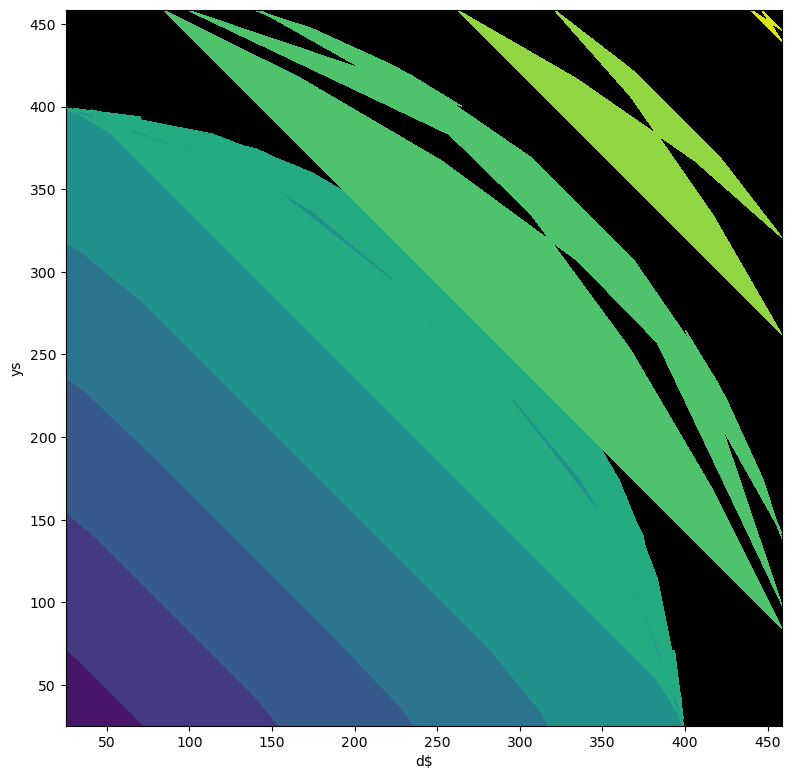

In [135]:
fig, ax = plt.subplots(figsize=(8, 8))



# set background black so np.nan appears black
ax.set_facecolor("black")  
    # contour acceleration vs position (in units of R), using filled contours: 
CSF = ax.contourf(
    cx, by, cz,  
)
# contour acceleration vs position using lines: 
# ax.contour(cx, by, cz, **contour_kwargs)
# label the line contours: 
# ax.clabel(CS, inline=True)
# plt.colorbar(mappable=CSF)           # add a colorbar and link to filled CSF
# ax.set_label(r"$ms^{-2}$", rotation=270)  # label the colorbar
# ax.the_title = f"Gravity field ({key})"      # format a title using dict key
# ax.set_title(the_title)
ax.set_xlabel(r"d$")
ax.set_ylabel(r"ys")
ax.set_aspect("equal")

plt.tight_layout()



___ 

### 3E) Ice near Mercury’s South Pole

- In this part you will use the “failed” experiments from **Part 3D**, to design a Mercury experiment analogous to the Lunar LCROSS mission that crashed into the South Pole of the Moon in search of water ice. Imagine that the x-coordinate in our problem points north, such that the point $(x = −R_p , y = 0)$ is Mercury’s south pole.
> -  Use the experiments from **Part 3D**, to find one or two spacecraft starting position(s) $s_{x0}$ and speeds $v_{y0}$ that result in a crash at a position that lies within 500 km of the south pole (i.e. the arc length along the surface from the south pole to the crash site must be < 500 km).
>   
> - Your starting position, $s_{x0}$ must be less than $−1R_p$ (i.e. the spacecraft must not initially have been on a direct collision course with the planet).
>   
> *Hint: A version of Figure 2 in which you show your contours for the "failed" experiments is helpful to narrow your search for possible starting conditions that result in crashes.*

<br> 

- **Figure 3:** Plot your spacecraft trajectories.
> - When you have found one or two positions that work, plot your spacecraft trajectory(ies) like in Figure 2 of **Part 2D** as far as the crash site.
> 
> - Do not plot the the computed trajectory for beyond the crash site - your curve should not extend to below the planet surface.
> 
> - Label your crash site position(s) and print the initial conditions $(v_{y0},  s_{x0})$ that resulted in the crash site(s).  


___ 

## Submission Instructions


### Part 3 SUBMISSION - MANDATORY, DUE FRIDAY November 24 (Week 12), 4 pm on Canvas.   

**Remember:** Suppress any extra `print()` statements that aren't necessary in your notebook for both `.ipynb` and `.pdf` submissions.

<br> 

#### TO SUBMIT: 
 1. Your python `.py` file named `flyby_fns.py` containing any functions you use in your main.
 >  *This should be the original or corrected (if you had code bugs) version from Part 2, and if you wrote any additional functions this week, they should be added to that file.* 

2.  A single Jupyter notebook with **5 cells** with contents as follows:
> - Cell 1: A Markdown cell with your names and student numbers
> - Cell 2: A code cell for `import` statements 
> - Cell 3: A code cell for **Part 3C**
> - Cell 4: A code cell for **Part 3D**
> - Cell 5: A code cell for **Part 3E**

    
3. A `.pdf` file of your full Jupyter Notebook which includes your code and output for **Figures 1, 2, and 3**.

4. Your `.csv` file for **Part 3C**, named `part3C_sx0_CA.txt`

 
Note that this submission includes the functions you wrote for Parts 1 and 2.  We will repeat our tests from Part 2 on these functions so if you corrected/updated it this will now be reflected in those autogrades.  

<div class="alert alert-block alert-warning">
<b> Warning: </b>
    Double check that your <b>.py</b> file can be executed successfully without error by importing it into a new notebook. Make sure that the python file does not contain anything other than import statements and function definitions or your file might not run. If your file cannot be imported then it will receive a failing grade.  
</div>